In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
hf = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [4]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [73]:
#hf = hf.drop('time',axis=1)

In [74]:
hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,0


In [75]:
hf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [76]:
hf_x = hf.iloc[:,:-1]
hf_y = hf.iloc[:,-1]

In [77]:
x = hf_x
y = hf_y
# just for back-up

In [78]:
import numpy as np

In [79]:
hf_x = np.array(hf_x)
hf_y = np.array(hf_y)
# for bouruta your input is to be in array format

In [80]:
from boruta import BorutaPy

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [82]:
boruta_feature_selector = BorutaPy(rfc, max_iter= 20,verbose=2)
boruta_feature_selector.fit(hf_x,hf_y)

Iteration: 	1 / 20
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 20
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 20
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 20
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 20
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 20
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 20
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 20
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	9 / 20
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	10 / 20
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	11 / 20
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	12 / 20
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	13 / 20
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	14 / 20
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	15 / 20
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	16 / 20
Confirmed: 	3
Tentative: 	3
Rejected: 	5
Iteration: 	17 / 20
Confir

BorutaPy(estimator=RandomForestClassifier(n_estimators=1000,
                                          random_state=RandomState(MT19937) at 0x1D53E722D40),
         max_iter=20, random_state=RandomState(MT19937) at 0x1D53E722D40,
         verbose=2)

In [83]:
boruta_feature_selector.support_

array([ True, False, False, False,  True, False, False,  True, False,
       False, False])

In [84]:
df = pd.DataFrame()
df['Features'] = x.columns
df['Importance']= boruta_feature_selector.support_

In [85]:
df[df['Importance']==True]

,Features,Importance
0,age,True
4,ejection_fraction,True
7,serum_creatinine,True


____________________________________________________________

### RFE - Recursive Feature Elimination 

In [94]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [95]:
rfe = RFE(dt, n_features_to_select=1)

In [96]:
rfe.fit(hf_x,hf_y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)

In [97]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False])

In [98]:
df = pd.DataFrame()
df['Features'] = x.columns
df['Importance']= rfe.support_

In [99]:
df[df['Importance']==True]

,Features,Importance
6,platelets,True


In [100]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score

### Sampling

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
train_hf,test_hf = train_test_split(hf, test_size=0.3)

In [103]:
train_hf_x = train_hf.iloc[:,:-1]
train_hf_y = train_hf.iloc[:,-1]

In [104]:
test_hf_x = test_hf.iloc[:,:-1]
test_hf_y = test_hf.iloc[:,-1]

In [116]:
print("*Logistic Regresssion*")
print("____________________________")
print()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_hf_x,train_hf_y)
pred = logreg.predict(test_hf_x)
tab = confusion_matrix(test_hf_y,pred)
print("Confusion Matrics")
print()
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print()
precision = precision_score(test_hf_y,pred)
print("precision = ",precision)
print()
#recall_score = recall_score(test_hf_y,pred)
#print("recall_score = ",recall_score)
print()
print()
print("*Decision Tree*")
print("____________________________")
print()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_hf_x,train_hf_y)
pred_dt = dt.predict(test_hf_x)
tab = confusion_matrix(test_hf_y,pred_dt)
print("Confusion Matrics")
print()
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print()
precision = precision_score(test_hf_y,pred)
print("precision = ",precision)
print()
#recall_score = recall_score(test_hf_y,pred)
#print("recall_score = ",recall_score)
print()
print("*Random Forest*")
print("____________________________")
print()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,  criterion='gini')
rf.fit(train_hf_x,train_hf_y)
pred_rf = rf.predict(test_hf_x)
tab = confusion_matrix(test_hf_y,pred_rf)
print("Confusion Matrics")
print()
print(tab)
print()
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)
print()
precision = precision_score(test_hf_y,pred_rf)
print("precision = ",precision)
print()
#recall_score = recall_score(test_hf_y,pred)
#print("recall_score = ",recall_score)


*Logistic Regresssion*
____________________________

Confusion Matrics

[[54 11]
 [17  8]]

Accuracy =  68.88888888888889

precision =  0.42105263157894735



*Decision Tree*
____________________________

Confusion Matrics

[[48 17]
 [15 10]]

Accuracy =  64.44444444444444

precision =  0.42105263157894735


*Random Forest*
____________________________

Confusion Matrics

[[50 15]
 [12 13]]

Accuracy =  70.0

precision =  0.4642857142857143



### AdaBoost

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [118]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(rf1, n_estimators=10)

In [119]:
abc.fit(train_hf_x,train_hf_y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=10)

In [120]:
abc_pred = abc.predict(test_hf_x)

In [121]:
tab = confusion_matrix(test_hf_y,abc_pred)
tab 

array([[52, 13],
       [12, 13]], dtype=int64)

In [122]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
print("Accuracy = ",Accuracy)

Accuracy =  72.22222222222223


### Features Importants using Random Forest

In [123]:
rf.feature_importances_

array([0.15355761, 0.01843159, 0.12123248, 0.01751715, 0.18419012,
       0.01911981, 0.11651319, 0.22172621, 0.10979029, 0.01971204,
       0.01820953])

In [124]:
feat_imp_df = pd.DataFrame()
feat_imp_df['Features'] = train_hf_x.columns
feat_imp_df['Imp'] = rf.feature_importances_
feat_imp_df.sort_values('Imp',ascending=False)

,Features,Imp
7,serum_creatinine,0.221726
4,ejection_fraction,0.184190
0,age,0.153558
2,creatinine_phosphokinase,0.121232
6,platelets,0.116513
8,serum_sodium,0.109790
9,sex,0.019712
5,high_blood_pressure,0.019120
1,anaemia,0.018432
10,smoking,0.018210


### Features Importants using DT

In [125]:
feat_imp_df = pd.DataFrame()
feat_imp_df['Features'] = train_hf_x.columns
feat_imp_df['Imp'] = dt.feature_importances_

In [126]:
feat_imp_df.sort_values('Imp',ascending=False)

,Features,Imp
7,serum_creatinine,0.305047
0,age,0.179679
4,ejection_fraction,0.170555
6,platelets,0.109026
8,serum_sodium,0.068310
2,creatinine_phosphokinase,0.050123
3,diabetes,0.042662
9,sex,0.038336
1,anaemia,0.036263
5,high_blood_pressure,0.000000


In [127]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from IPython.display import Image 
from six import StringIO

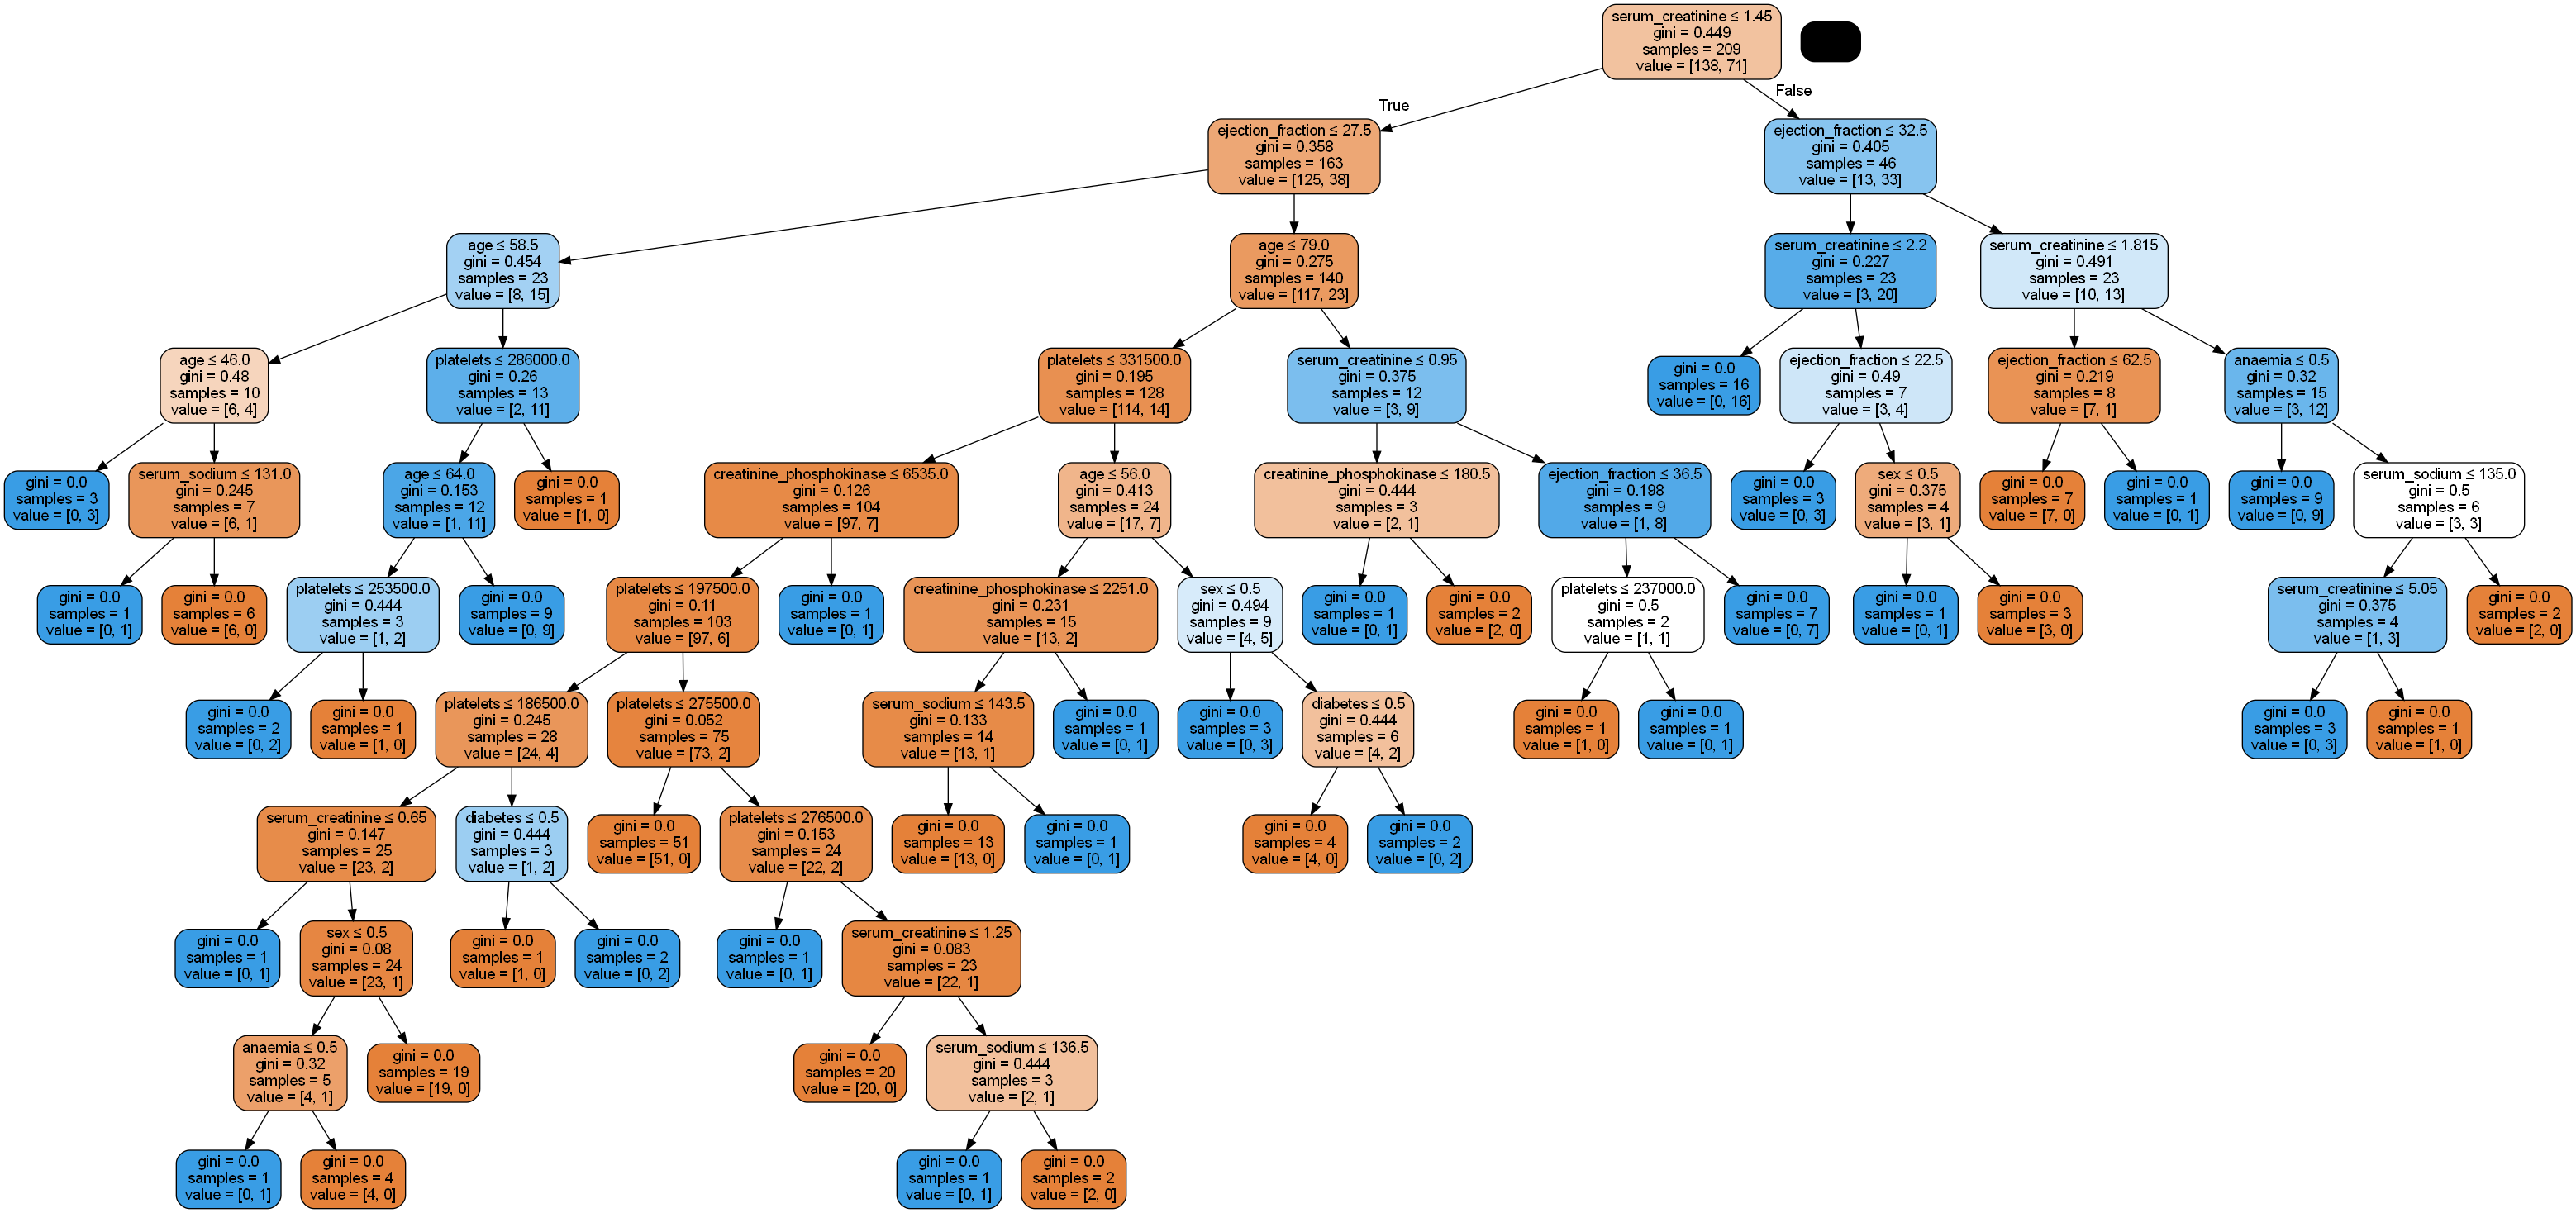

<Figure size 1200x1200 with 0 Axes>

In [128]:
dot_data = StringIO()  ## creating a empty  file 
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=train_hf_x.columns  )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())